In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

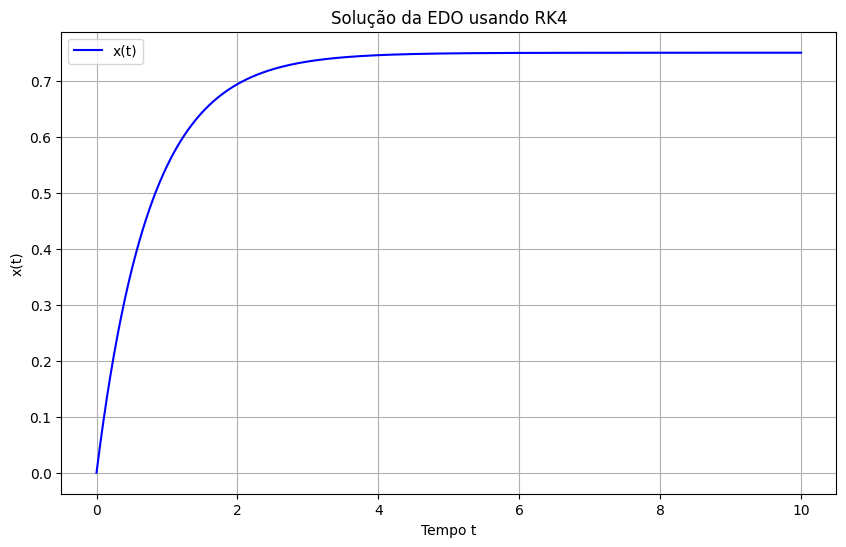

In [71]:


# Reutilizando a função f(x) e rk4_si_step(x, dt) fornecidas anteriormente
def f(x):
    return 1 - x - ((5*x) / (12 + 4*x))

def rk4_si_step(x, dt):
    k1_s = dt * f(x)
    k2_s = dt * f(x + dt/2 * k1_s)
    k3_s = dt * f(x + dt/2 * k2_s)
    k4_s = dt * f(x + dt * k3_s)
    x_next = x + (k1_s + 2 * k2_s + 2 * k3_s + k4_s) / 6
    return x_next

# Parâmetros iniciais
x0 = 0
dt = 0.01
n_steps = 64  # Número de passos

# Arrays para armazenar os valores de x e t

dfs = []

# Executando o RK4 para vários passos
for it in range(1,6):
    n_steps = n_steps ** 2
    for i in range(1, n_steps + 1):
        
        xs = [x0]
        ts = [0]
        ts.append(i*dt)
        xs.append(rk4_si_step(xs[-1], dt))

        df_x = pd . DataFrame ({
        't': ts ,
        'x': xs 
        })
    dfs.append(df_x)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ts, xs, label='x(t)', color='blue')
plt.title('Solução da EDO usando RK4')
plt.xlabel('Tempo t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

    df_x = pd . DataFrame ({
        't': t_values ,
        'x': x_values 
    })
    dfs.append(df_x)
df_x.to_csv('RK2_approx.csv')

In [68]:
dfs[3]

,t,x
0,0.00000,0.000000
1,0.00125,0.009999
2,0.00250,0.019857
3,0.00375,0.029576
4,0.00500,0.039157
...,...,...
3195,3.99375,0.750000
3196,3.99500,0.750000
3197,3.99625,0.750000
3198,3.99750,0.750000


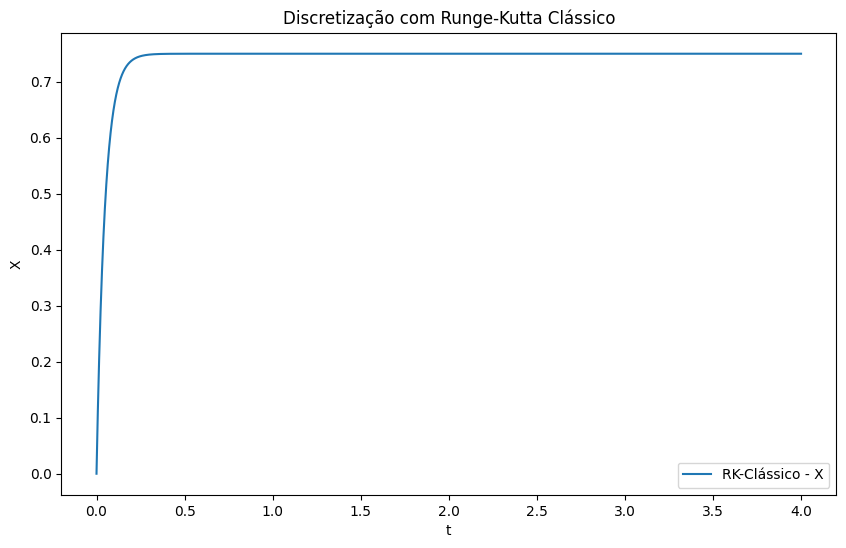

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, '-', label='RK-Clássico - X')


plt.xlabel('t')

plt.ylabel('X')
plt.title('Discretização com Runge-Kutta Clássico')
plt.legend()
plt.show()


In [50]:
def gera_tabela2(dfs):
    n = [2**5,2**6,2**7,2**8,2**9,2**10,2**11]
    x_ordem = []
    for i in range(len(dfs) - 2):
        x_ordem.append( (dfs[i]['x'].iloc[-1] - dfs[i+1]['x'].iloc[-1]) / (dfs[i+1]['x'].iloc[-1] - dfs[i+2]['x'].iloc[-1]))
       
        
    x_ordem.append('---')
    x_ordem.append('---')
    print(x_ordem)
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        'Ordem P' : x_ordem
    })
    
    return tabela_erro2


   

In [51]:
tabela2 = gera_tabela2(dfs)
tabela2

[157.69295880020385, 25165.64576660661, -inf, '---', '---']


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_26964\3131262208.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  x_ordem.append( (dfs[i]['x'].iloc[-1] - dfs[i+1]['x'].iloc[-1]) / (dfs[i+1]['x'].iloc[-1] - dfs[i+2]['x'].iloc[-1]))


ValueError: All arrays must be of the same length